In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("D:/Training/Academy/ML(Python)/Datasets")

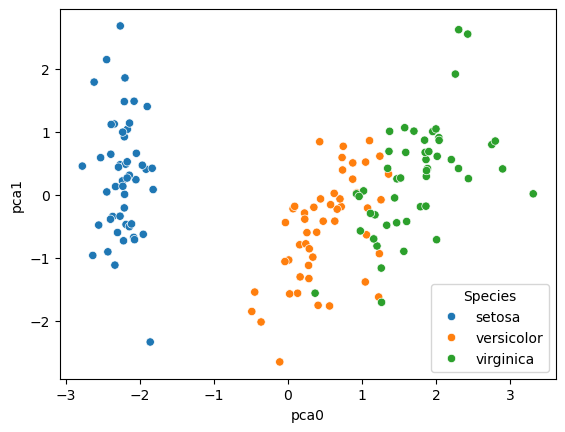

In [4]:
iris = pd.read_csv("iris.csv")
X, y = iris.drop('Species', axis=1), iris['Species']
scaler = StandardScaler().set_output(transform='pandas')
X_scaled = scaler.fit_transform( X )
prcomp = PCA().set_output(transform='pandas')
X_pca = prcomp.fit_transform(X_scaled)
X_pca['Species'] = y 
sns.scatterplot(data=X_pca, x='pca0', y='pca1', hue='Species')
plt.show()

In [5]:
np.cumsum(prcomp.explained_variance_ratio_)*100

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

Using with Supervised Learning

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder

In [10]:
iris = pd.read_csv("iris.csv")
X, y = iris.drop('Species', axis=1), iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                   stratify=y)
scaler = StandardScaler().set_output(transform='pandas')
X_trn_scl = scaler.fit_transform(X_train)
prcomp = PCA().set_output(transform='pandas')
X_trn_pca = prcomp.fit_transform(X_trn_scl)
lr = LogisticRegression()
lr.fit(X_trn_pca.iloc[:, :2], y_train)

X_tst_scl = scaler.transform(X_test)
X_tst_pca = prcomp.transform(X_tst_scl)
y_pred_prob = lr.predict_proba(X_tst_pca.iloc[:, :2])
print(log_loss(y_test, y_pred_prob))
y_pred = lr.predict(X_tst_pca.iloc[:, :2])
print(accuracy_score(y_test, y_pred))

0.20790417014553403
0.8888888888888888


#### HR

In [16]:
hr = pd.read_csv("D:/Training/Academy/ML(Python)/Cases/human-resources-analytics/HR_comma_sep.csv")
X, y = hr.drop('left', axis=1), hr['left']
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform='pandas')
col_trnf = ColumnTransformer([('OHE',ohe, make_column_selector(dtype_include=object) )],
                             remainder='passthrough', verbose_feature_names_out=False)
col_trnf = col_trnf.set_output(transform='pandas')
X = col_trnf.fit_transform(X)
X.shape

(14995, 18)

In [15]:
X_scaled = scaler.fit_transform( X )
prcomp = PCA().set_output(transform='pandas')
X_pca = prcomp.fit_transform(X_scaled)
np.cumsum( prcomp.explained_variance_ratio_*100 )

array([ 10.42723133,  20.58793491,  27.95567097,  34.76490283,
        41.43340638,  47.76274027,  53.86705251,  59.78971986,
        65.6726812 ,  71.52370417,  77.29664846,  82.69834762,
        87.55599268,  92.10660041,  95.62030665,  98.658159  ,
        99.46053041, 100.        ])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                   stratify=y)

In [26]:
for n_features in [8,9,10,11,12,13,14,15, 16]:
    X_trn_scl = scaler.fit_transform(X_train)
    X_trn_pca = prcomp.fit_transform(X_trn_scl)
    lr.fit(X_trn_pca.iloc[:, :n_features], y_train)

    X_tst_scl = scaler.transform(X_test)
    X_tst_pca = prcomp.transform(X_tst_scl)
    y_pred_prob = lr.predict_proba(X_tst_pca.iloc[:, :n_features])
    print("No. of Components:", n_features)
    print("Log Loss: ", log_loss(y_test, y_pred_prob))
    y_pred = lr.predict(X_tst_pca.iloc[:, :n_features])
    print("Accuracy:",accuracy_score(y_test, y_pred))

No. of Components: 8
Log Loss:  0.4710583566950658
Accuracy: 0.7777283840853523
No. of Components: 9
Log Loss:  0.4704549849456313
Accuracy: 0.78239608801956
No. of Components: 10
Log Loss:  0.46999432951219156
Accuracy: 0.7815070015559014
No. of Components: 11
Log Loss:  0.45727924255034397
Accuracy: 0.7743943098466326
No. of Components: 12
Log Loss:  0.4552867295040927
Accuracy: 0.7732829517670593
No. of Components: 13
Log Loss:  0.45528068169510366
Accuracy: 0.7732829517670593
No. of Components: 14
Log Loss:  0.45465106386973336
Accuracy: 0.7737274949988886
No. of Components: 15
Log Loss:  0.45350024057572513
Accuracy: 0.773505223382974
No. of Components: 16
Log Loss:  0.4352712530390712
Accuracy: 0.7863969771060235


In [27]:
from sklearn.pipeline import Pipeline

In [33]:
for n_features in [8,9,10,11,12,13,14,15, 16]:
    prcomp = PCA(n_components=n_features).set_output(transform='pandas')
    pipe = Pipeline([('SCL',scaler),('PCA',prcomp),('LR',lr)])
    pipe.fit(X_train, y_train)
    y_pred_prob = pipe.predict_proba(X_test)
    print("No. of Components:", n_features)
    print("Log Loss: ", log_loss(y_test, y_pred_prob))
    y_pred = pipe.predict(X_test)
    print("Accuracy:",accuracy_score(y_test, y_pred))

No. of Components: 8
Log Loss:  0.4710583566950658
Accuracy: 0.7777283840853523
No. of Components: 9
Log Loss:  0.4704549849456313
Accuracy: 0.78239608801956
No. of Components: 10
Log Loss:  0.46999432951219156
Accuracy: 0.7815070015559014
No. of Components: 11
Log Loss:  0.45727924255034397
Accuracy: 0.7743943098466326
No. of Components: 12
Log Loss:  0.4552867295040927
Accuracy: 0.7732829517670593
No. of Components: 13
Log Loss:  0.45528068169510355
Accuracy: 0.7732829517670593
No. of Components: 14
Log Loss:  0.45465106386973336
Accuracy: 0.7737274949988886
No. of Components: 15
Log Loss:  0.45350024057572513
Accuracy: 0.773505223382974
No. of Components: 16
Log Loss:  0.4352712530390712
Accuracy: 0.7863969771060235


In [40]:
np.linspace(0.5, 0.95, 15)

array([0.5       , 0.53214286, 0.56428571, 0.59642857, 0.62857143,
       0.66071429, 0.69285714, 0.725     , 0.75714286, 0.78928571,
       0.82142857, 0.85357143, 0.88571429, 0.91785714, 0.95      ])

In [43]:
scores = []
for p_features in np.linspace(0.5, 0.95, 15):
    prcomp = PCA(n_components=p_features).set_output(transform='pandas')
    pipe = Pipeline([('SCL',scaler),('PCA',prcomp),('LR',lr)])
    pipe.fit(X_train, y_train)
    y_pred_prob = pipe.predict_proba(X_test)
    scores.append([ p_features*100, 
                   log_loss(y_test, y_pred_prob), accuracy_score(y_test, y_pred)])
df_scores = pd.DataFrame(scores, columns=['perc_var','logloss','acc'])

In [44]:
df_scores.sort_values('logloss')

,perc_var,logloss,acc
14,95.000000,0.453500,0.773505
12,88.571429,0.454651,0.773505
13,91.785714,0.454651,0.773505
11,85.357143,0.455281,0.773505
9,78.928571,0.455287,0.773505
10,82.142857,0.455287,0.773505
7,72.500000,0.457279,0.773505
8,75.714286,0.457279,0.773505
5,66.071429,0.469994,0.773505
6,69.285714,0.469994,0.773505


Involving `ColumnTransformer` in Pipeline

In [48]:
hr = pd.read_csv("D:/Training/Academy/ML(Python)/Cases/human-resources-analytics/HR_comma_sep.csv")
X, y = hr.drop('left', axis=1), hr['left']
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform='pandas')
col_trnf = ColumnTransformer([('OHE',ohe, make_column_selector(dtype_include=object) )],
                             remainder='passthrough', verbose_feature_names_out=False)
col_trnf = col_trnf.set_output(transform='pandas')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                   stratify=y)

In [52]:
scores = []
for p_features in np.linspace(0.5, 0.95, 15):
    prcomp = PCA(n_components=p_features).set_output(transform='pandas')
    pipe = Pipeline([('TRNFS', col_trnf),('SCL',scaler),('PCA',prcomp),('LR',lr)])
    pipe.fit(X_train, y_train)
    y_pred_prob = pipe.predict_proba(X_test)
    scores.append([ p_features*100, 
                   log_loss(y_test, y_pred_prob), accuracy_score(y_test, y_pred)])
df_scores = pd.DataFrame(scores, columns=['perc_var','logloss','acc'])

In [53]:
df_scores.sort_values('logloss')

,perc_var,logloss,acc
14,95.000000,0.453500,0.773505
12,88.571429,0.454651,0.773505
13,91.785714,0.454651,0.773505
11,85.357143,0.455281,0.773505
9,78.928571,0.455287,0.773505
10,82.142857,0.455287,0.773505
7,72.500000,0.457279,0.773505
8,75.714286,0.457279,0.773505
5,66.071429,0.469994,0.773505
6,69.285714,0.469994,0.773505
